In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 18})

Defining the correlation function:

In [8]:
# The funciton to calculate correlation
def correlation(arr1,arr2):
	return np.fft.ifft(np.fft.fft(arr1)*np.conj(np.fft.fft(arr2)))

First, calculating the correlation using fourier representation:

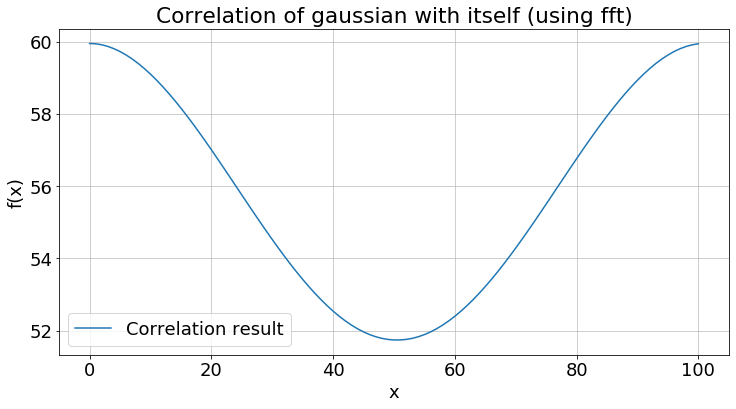

In [9]:
# Defining array, centered at zero
x = np.linspace(-1,1,101)
y1 = np.exp(-x**2)
y2 = y1.copy() # MAking a second copy
corr = correlation(y1,y2) # Calculating correlation of gaussian with itself

plt.figure(figsize=(12,6))      
plt.title('Correlation of gaussian with itself (using fft)')
plt.xlabel('x')
plt.grid(alpha=0.75)
plt.ylabel('f(x)')
#plt.plot(y1,label='Gaussian')
plt.plot(np.abs(corr),label = 'Correlation result')
plt.legend()
plt.show()
plt.close()

We can verify this result with the basic definition of correlation as follows. Here I convert the integral to a discrete sum.

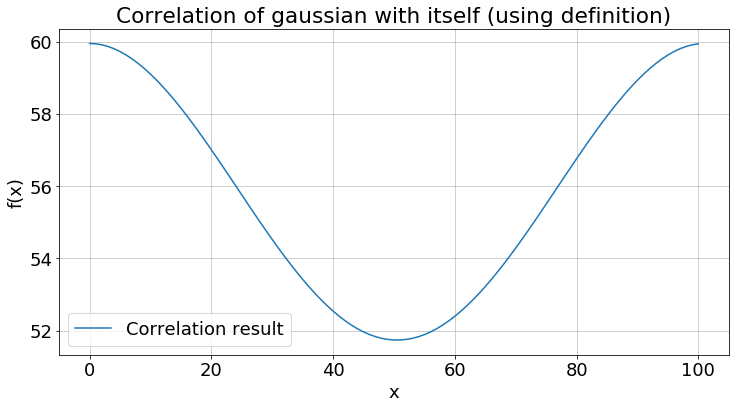

In [10]:
# Taking sum over x, using definition of correlation
corr2 = np.zeros(len(x))
for i in range(len(x)):
	for j in range(len(x)):
		corr2[i] += y1[j]*y2[(j+i)%len(x)]
		
plt.figure(figsize=(12,6))      
plt.title('Correlation of gaussian with itself (using definition)')
plt.xlabel('x')
plt.grid(alpha=0.75)
plt.ylabel('f(x)')
#plt.plot(y1,label='Gaussian')
plt.plot(corr2,label = 'Correlation result')
plt.legend()
plt.show()
plt.close()


As expected, we get the same plot